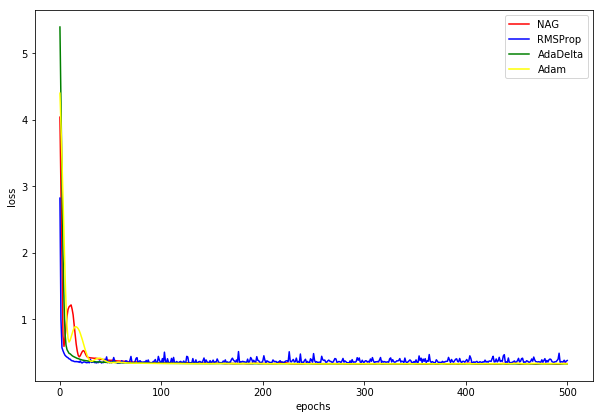

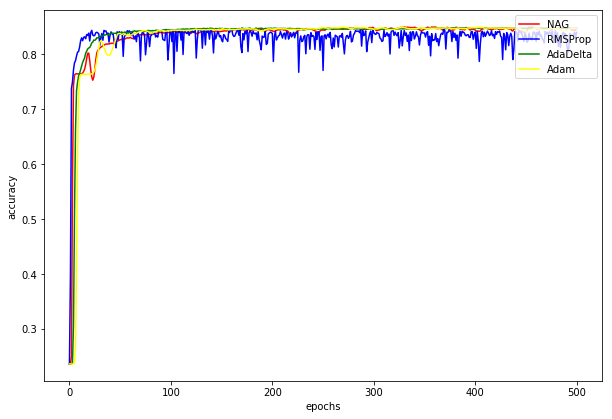

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix, hstack   
 
#获取文件数据    
def get_data(file, n_features=None):
    if n_features==None:
        inputs,labels = datasets.load_svmlight_file(file)
    else:
        inputs,labels = datasets.load_svmlight_file(file,n_features=n_features)
        
    one = np.ones((inputs.shape[0],1))
    inputs = hstack([inputs, csr_matrix(one)]).toarray()
    labels = np.array(labels).reshape(inputs.shape[0],1)
    labels[labels==-1] = 0
    return inputs, labels

#the sigmoid function
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

#标记
def sign(x,threshold):
    if x>=threshold:
        return 1
    else:
        return 0
    
# NAG
def NAG(X_train,Y_train,X_test,Y_test,gamma=0.9,threshold=0.5,learning_rate=0.1,batch_size=64,epoch=500):
    gradients = np.zeros((X_train.shape[1],1))
    w = np.random.rand(X_train.shape[1], 1)
    momentum = np.zeros((X_train.shape[1], 1))
    epoch_set = []
    l_nag = []
    a_nag = []
    #training
    for i in range(epoch+1):
        batch_step=random.randint(0,X_train.shape[0]-batch_size-1)
        for j in range(batch_step,batch_step+batch_size):
            gradients = gradients+((sigmoid(np.dot(X_train[j],(w-gamma*momentum)))-Y_train[j])*X_train[j]).reshape((X_train.shape[1],1))
        gradients = gradients/batch_size
        momentum=gamma*momentum+learning_rate*gradients
        w = w - momentum
        epoch_set.append(i)
        loss = 0.0
        res = 0
        for k in range(X_test.shape[0]):
            h = sigmoid(np.dot(X_test[k],(w-gamma*momentum)))
            loss =loss+(Y_test[k]*np.log(h)+(1-Y_test[k])*np.log(1-h))
            if sign(h,threshold) == Y_test[k]:
                res=res+1
        accuracy = res/X_test.shape[0]
        loss =-loss/X_test.shape[0]
        a_nag.append(accuracy)
        l_nag.append(loss)            
    return a_nag,l_nag,epoch_set
 
#RMSProp
def RMSProp(X_train,Y_train,X_test,Y_test,gamma=0.9,epsilon=1e-10,threshold=0.5,learning_rate=0.1,batch_size=64,epoch=500):
    gradients = np.zeros((X_train.shape[1],1))
    w = np.random.rand(X_train.shape[1], 1)
    G = np.zeros((X_train.shape[1],1))
    epoch_set = []
    l_rmsp = []
    a_rmsp = []
    # training 
    for i in range(epoch+1):
        batch_step=random.randint(0,X_train.shape[0]-batch_size-1)
        for j in range(batch_step,batch_step+batch_size):
            gradients = gradients+((sigmoid(np.dot(X_train[j],w))-Y_train[j])*X_train[j]).reshape((X_train.shape[1],1))
        gradients = gradients/batch_size
        G = gamma*G+np.multiply((1-gamma)*gradients,gradients)
        w = w-np.multiply(learning_rate/(np.sqrt(G+epsilon)),gradients)
        epoch_set.append(i)
        loss=0.0
        res=0
        for k in range(X_test.shape[0]):
            h = sigmoid(np.dot(X_test[k],w))
            loss = loss+(Y_test[k]*np.log(h)+(1-Y_test[k])*np.log(1-h))
            if sign(h,threshold)==Y_test[k]:
                res = res+1
        accuracy = res/X_test.shape[0]
        loss = -loss/X_test.shape[0]
        a_rmsp.append(accuracy)
        l_rmsp.append(loss)            
    return a_rmsp,l_rmsp

#AdaDelta
def AdaDelta(X_train,Y_train,X_test,Y_test,gamma=0.9,epsilon=1e-10,threshold=0.5,dx=0.001,batch_size=64,epoch=500):
    gradients = np.zeros((X_train.shape[1],1))
    w = np.random.rand(X_train.shape[1], 1)
    G = np.zeros((X_train.shape[1],1))
    epoch_set = []
    l_adad = []
    a_adad = []
    # training 
    for i in range(epoch+1):
        batch_step=random.randint(0,X_train.shape[0]-batch_size-1)
        for j in range(batch_step,batch_step+batch_size):
            gradients = gradients+((sigmoid(np.dot(X_train[j],w))-Y_train[j])*X_train[j]).reshape((X_train.shape[1],1))
        gradients = gradients/batch_size
        G=gamma*G+np.multiply((1-gamma)*gradients,gradients)
        dw = -np.multiply((np.sqrt(dx+epsilon))/(np.sqrt(G+epsilon)),gradients)
        w = w+dw
        dx=gamma*dx+np.multiply((1-gamma)*dw,dw)
        epoch_set.append(i)
        loss=0.0
        res=0
        for k in range(X_test.shape[0]):
            h = sigmoid(np.dot(X_test[k],w))
            loss = loss+(Y_test[k]*np.log(h)+(1-Y_test[k])*np.log(1-h))
            if sign(h,threshold)==Y_test[k]:
                res = res+1
        accuracy = res/X_test.shape[0]
        loss= -loss/X_test.shape[0]
        a_adad.append(accuracy)
        l_adad.append(loss)            
    return a_adad,l_adad

#Adam
def Adam(X_train,Y_train,X_test,Y_test,beta=0.9,gamma=0.999,epsilon=1e-8,threshold=0.5,learning_rate=0.01,batch_size=64,epoch=500):
    gradients = np.zeros((X_train.shape[1],1))
    w = np.random.rand(X_train.shape[1], 1)
    G = np.zeros((X_train.shape[1],1))
    moments = np.zeros((X_train.shape[1], 1))
    epoch_set = []
    l_adam = []
    a_adam = []
    # training 
    for i in range(epoch+1):
        batch_step=random.randint(0,X_train.shape[0]-batch_size-1)
        for j in range(batch_step,batch_step+batch_size):
            gradients = gradients+((sigmoid(np.dot(X_train[j],w))-Y_train[j])*X_train[j]).reshape((X_train.shape[1],1))
        gradients = gradients/batch_size  
        moments = beta*moments+(1-beta)*gradients
        G = gamma*G+np.multiply((1-gamma)*gradients,gradients)
        #alpha = learning_rate*(np.sqrt(1-gamma))/(1-beta)
        alpha = learning_rate
        w = w-alpha*moments/(np.sqrt(G+epsilon))
        epoch_set.append(i)
        loss=0.0
        res=0
        for k in range(X_test.shape[0]):
            h = sigmoid(np.dot(X_test[k],w))
            loss = loss+(Y_test[k]*np.log(h)+(1-Y_test[k])*np.log(1-h))
            if sign(h,threshold)==Y_test[k]:
                res = res+1
        accuracy = res/X_test.shape[0]
        loss = -loss/X_test.shape[0]
        a_adam.append(accuracy)
        l_adam.append(loss)            
    return a_adam,l_adam


# 画图
def plot_loss(epoch_set,l_nag,l_rmsp,l_adad,l_adam):
    plt.figure(figsize=(10,15))
    plt.subplot(211)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(epoch_set, l_nag,color='red',label='NAG',linewidth=1.5,linestyle='-')
    plt.plot(epoch_set, l_rmsp,color='blue',label='RMSProp',linewidth=1.5,linestyle='-')
    plt.plot(epoch_set, l_adad,color='green',label='AdaDelta',linewidth=1.5,linestyle='-')
    plt.plot(epoch_set, l_adam,color='yellow',label='Adam',linewidth=1.5,linestyle='-')
    plt.legend(loc='upper right')
    plt.show()
    
def plot_accuracy(epoch_set,a_nag,a_rmsp,a_adad,a_adam):
    plt.figure(figsize=(10,15))
    plt.subplot(211)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(epoch_set, a_nag,color='red',label='NAG',linewidth=1.5,linestyle='-')
    plt.plot(epoch_set, a_rmsp,color='blue',label='RMSProp',linewidth=1.5,linestyle='-')
    plt.plot(epoch_set, a_adad,color='green',label='AdaDelta',linewidth=1.5,linestyle='-')
    plt.plot(epoch_set, a_adam,color='yellow',label='Adam',linewidth=1.5,linestyle='-')
    plt.legend(loc='upper right')
    plt.show()


if __name__ == "__main__":
    x_train,y_train = get_data('a9a')
    x_test,y_test = get_data('a9a.t',x_train.shape[1]-1)
    a_nag,l_nag,epoch_set = NAG(x_train,y_train,x_test,y_test)
    a_rmsp,l_rmsp = RMSProp(x_train,y_train,x_test,y_test)
    a_adad,l_adad = AdaDelta(x_train,y_train,x_test,y_test)
    a_adam,l_adam = Adam(x_train,y_train,x_test,y_test)
    
    plot_loss(epoch_set,l_nag,l_rmsp,l_adad,l_adam)
    plot_accuracy(epoch_set,a_nag,a_rmsp,a_adad,a_adam)
    #print('Accuracy of validation set by NAG:',a_nag)
    #print('Accuracy of validation set by RMSProp:',a_rmsp)
    #print('Accuracy of validation set by AdaDelta:',a_adad)
    #print('Accuracy of validation set by Adam:',a_adam)
